In [29]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [12]:
# Step 1: Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [13]:
# Step 2: Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Step 3: Apply k-means clustering for centroid initialization
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
centroids = kmeans.cluster_centers_


C:\ProgramData\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
# Step 4: Define RBF activation function
def rbf_activation(data, centroids, sigma):
    distances = np.linalg.norm(data - centroids, axis=1)
    return np.exp(-0.5 * (distances / sigma)**2)

In [16]:
# Step 5: Calculate RBF activations for each data point
sigma_value = 1.0  # You may adjust this parameter
rbf_output = np.array([rbf_activation(x, centroids, sigma_value) for x in X_scaled])


In [17]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(rbf_output, y, test_size=0.2, random_state=42)


In [18]:
# Step 7: Apply LMS for training
learning_rate = 0.01
epochs = 1000
weights = np.random.rand(rbf_output.shape[1])

In [19]:
for epoch in range(epochs):
    predictions = np.dot(X_train, weights)
    error = y_train - predictions
    weights += learning_rate * np.dot(error, X_train) / len(X_train)


In [20]:
# Step 8: Predict using the trained weights
predictions_test = np.dot(X_test, weights)
mse = mean_squared_error(y_test, predictions_test)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.33500589043288526


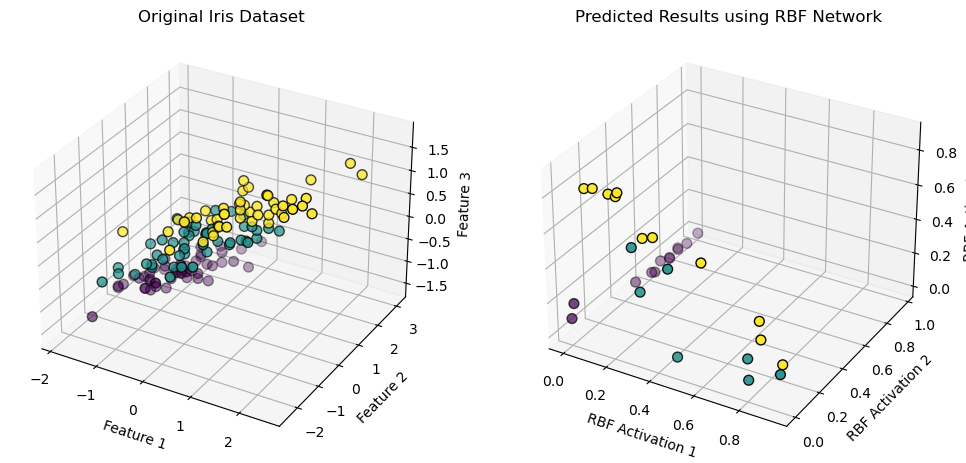

In [34]:
# Plot original Iris dataset
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y, cmap='viridis', edgecolor='k', s=50)
ax1.set_title('Original Iris Dataset')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')

# Plot predicted results
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=np.round(predictions_test), cmap='viridis', edgecolor='k', s=50)
ax2.set_title('Predicted Results using RBF Network')
ax2.set_xlabel('RBF Activation 1')
ax2.set_ylabel('RBF Activation 2')
ax2.set_zlabel('RBF Activation 3')
plt.show()

Text(0.5, 0, 'RBF Activation 3')